In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

np.random.seed(42)

In [ ]:
base_triangle = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
])

num_samples = 200
luminosity_range = (-1.0, 1.0)


def rotate_triangle(triangle, theta):
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)],
    ])
    return (rotation_matrix @ triangle.T).T


def scale_triangle(triangle, scale):
    return scale * triangle


def translate_triangle(triangle, shift):
    return triangle + shift


# Generate separate datasets for different transformation combos
triangles = {
    "rotate_only": [],
    "scale_only": [],
    "translate_only": [],
    "rotate_scale": [],
    "rotate_translate": [],
    "scale_translate": [],
    "all_combined": [],
}

luminosities = {key: [] for key in triangles.keys()}
metadata = {key: [] for key in triangles.keys()}

for _ in range(num_samples):
    theta = np.random.uniform(0, 2 * np.pi)
    scale = np.random.uniform(0.5, 5)
    translation = np.random.uniform(-10, 10, size=2)
    lum_value = np.random.uniform(*luminosity_range)

    # Rotate only
    rot = rotate_triangle(base_triangle, theta)
    triangles["rotate_only"].append(rot)
    luminosities["rotate_only"].append(np.full(3, lum_value))
    metadata["rotate_only"].append({"theta": theta, "luminosity": lum_value})

    # Scale only
    scl = scale_triangle(base_triangle, scale)
    triangles["scale_only"].append(scl)
    luminosities["scale_only"].append(np.full(3, lum_value))
    metadata["scale_only"].append({"scale": scale, "luminosity": lum_value})

    # Translate only
    trans = translate_triangle(base_triangle, translation)
    triangles["translate_only"].append(trans)
    luminosities["translate_only"].append(np.full(3, lum_value))
    metadata["translate_only"].append({"translation": translation, "luminosity": lum_value})

    # Rotate + Scale
    rot_scale = scale_triangle(rot, scale)
    triangles["rotate_scale"].append(rot_scale)
    luminosities["rotate_scale"].append(np.full(3, lum_value))
    metadata["rotate_scale"].append({"theta": theta, "scale": scale, "luminosity": lum_value})

    # Rotate + Translate
    rot_trans = translate_triangle(rot, translation)
    triangles["rotate_translate"].append(rot_trans)
    luminosities["rotate_translate"].append(np.full(3, lum_value))
    metadata["rotate_translate"].append({"theta": theta, "translation": translation, "luminosity": lum_value})

    # Scale + Translate
    scl_trans = translate_triangle(scl, translation)
    triangles["scale_translate"].append(scl_trans)
    luminosities["scale_translate"].append(np.full(3, lum_value))
    metadata["scale_translate"].append({"scale": scale, "translation": translation, "luminosity": lum_value})

    # Rotate + Scale + Translate
    all_combo = translate_triangle(rot_scale, translation)
    triangles["all_combined"].append(all_combo)
    luminosities["all_combined"].append(np.full(3, lum_value))
    metadata["all_combined"].append({"theta": theta, "scale": scale, "translation": translation, "luminosity": lum_value})

# Stack vertices and luminosities for each transformation family
stacked_points = {name: np.vstack(family) for name, family in triangles.items()}
stacked_luminosities = {name: np.concatenate(family) for name, family in luminosities.items()}

print({name: pts.shape for name, pts in stacked_points.items()})


{'rotate_only': (600, 2), 'scale_only': (600, 2), 'translate_only': (600, 2), 'rotate_scale': (600, 2), 'rotate_translate': (600, 2), 'scale_translate': (600, 2), 'all_combined': (600, 2)}


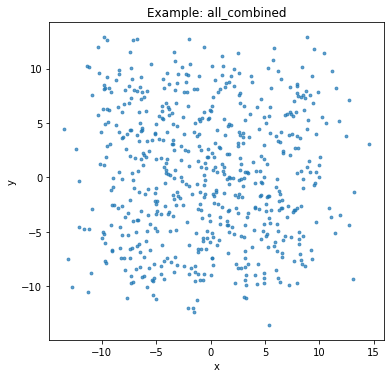

Luminosity stats for all_combined: min=-0.969, max=0.974


In [34]:
# Quick scatter plot to visualize the generated vertices for each transformation family

def plot_points(points, ax=None, title="Transformed Right-Triangle Vertices"):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(points[:, 0], points[:, 1], s=8, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_aspect('equal')
    return ax

example_key = "all_combined"
plot_points(stacked_points[example_key], title=f"Example: {example_key}")
plt.show()

print(f"Luminosity stats for {example_key}: min={stacked_luminosities[example_key].min():.3f}, max={stacked_luminosities[example_key].max():.3f}")



In [35]:
# Configure output directory for CSV export
out_dir = Path("/Users/marxena/Desktop/Homology /")
out_dir.mkdir(parents=True, exist_ok=True)

print("Prepared output directory for CSV export only (no .npy files saved).")


Prepared output directory for CSV export only (no .npy files saved).


In [36]:
# Export combined dataset to CSV (including vertices, luminosity, and transformation parameters)
rows = []
for family, tris in triangles.items():
    lum_list = luminosities[family]
    meta_list = metadata[family]
    for sample_idx, (tri, lum_vec, meta) in enumerate(zip(tris, lum_list, meta_list)):
        theta = meta.get("theta", np.nan)
        scale = meta.get("scale", np.nan)
        translation = meta.get("translation")
        if translation is None:
            tx, ty = np.nan, np.nan
        else:
            tx, ty = float(translation[0]), float(translation[1])
        lum_value = meta.get("luminosity", np.nan)
        for vertex_idx, (point, lum) in enumerate(zip(tri, lum_vec)):
            rows.append({
                "family": family,
                "sample_id": sample_idx,
                "vertex_id": vertex_idx,
                "x": float(point[0]),
                "y": float(point[1]),
                "luminosity": float(lum),
                "theta": float(theta) if not np.isnan(theta) else np.nan,
                "scale": float(scale) if not np.isnan(scale) else np.nan,
                "translation_x": tx,
                "translation_y": ty,
                "luminosity_sample": float(lum_value) if not np.isnan(lum_value) else np.nan,
            })

df = pd.DataFrame(rows)

csv_path = out_dir / "fake_triangle_data.csv"
df.to_csv(csv_path, index=False)

print(f"Exported combined dataset to {csv_path}")
print(df.head())


Exported combined dataset to /Users/marxena/Desktop/Homology /fake_triangle_data.csv
        family  sample_id  vertex_id         x         y  luminosity  \
0  rotate_only          0          0  0.000000  0.000000   -0.687963   
1  rotate_only          0          1 -0.709147 -0.705061   -0.687963   
2  rotate_only          0          2 -0.705061  0.709147   -0.687963   
3  rotate_only          1          0  0.000000  0.000000    0.416145   
4  rotate_only          1          1 -0.830577  0.556904    0.416145   

      theta  scale  translation_x  translation_y  luminosity_sample  
0  2.353305    NaN            NaN            NaN          -0.687963  
1  2.353305    NaN            NaN            NaN          -0.687963  
2  2.353305    NaN            NaN            NaN          -0.687963  
3  0.980142    NaN            NaN            NaN           0.416145  
4  0.980142    NaN            NaN            NaN           0.416145  
